# Vision Computacional - Tarea 1 

- **Profesor**: Takeshi Asahi K.
- **Estudiante**: Matthias Clein E. 

## Dataset

El dataset seleccionado tiene por nombre *"Car License Plate Detection"*, fue extraído de la plataforma Kaggle (https://www.kaggle.com/datasets/andrewmvd/car-plate-detection) y es propiedad del usuario *Larxel*. Se trata de una colección de imágenes de automóviles en las cuales se puede apreciar su placa patente desde distintos ángulos. Cuenta con dos directorios: *annotations*, que contiene las posiciones de las placas patentes dentro de cada imagen en formato PASCAL VOC e *images* que contiene 433 imágenes de automóviles de distintos modelos y colores en diferentes posiciones y con diferentes tipos de iluminación y colores/paisajes de fondo.

Las imágenes del dataset tienen distintos tamaños por lo que deberán ser preprocesadas para estandarizar su ancho y alto.

El propietario del dataset no entrega información sobre los tipos de sensores con los que fueron capturadas las fotografías, ni informa de qué fuente fueron obtenidas, pero se infiere que no se trata de un trabajo original/propio sino que de una recopilación de imágenes extraídas desde buscadores.

## Composición del dataset

Importamos las librerías de manejo de sistema y manipulación de imágenes.

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

Comprobamos la cantidad de imágenes que contiene el directorio *images* del dataset.

In [2]:
images_path = './data/images/'
print(f"El dataset 'Car License Plate Detection' contiene {len(os.listdir(images_path))} imágenes.")

El dataset 'Car License Plate Detection' contiene 433 imágenes.


## Imagen de ejemplo

Con la librería matplotlib abrimos la primera imagen del directorio *images*, además de imprimir sus dimensiones.

(268, 500, 3)


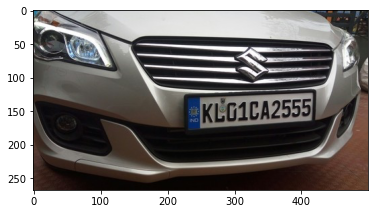

In [3]:
img = plt.imread('./data/images/Cars0.png')
print(img.shape)
plt.imshow(img)
plt.show()

A continuación se presentan las dimensiones de las primeras 10 imágenes del directorio *images*.

In [4]:
i = 0
num_images = 10
for car_image in sorted(os.listdir(images_path)):
    img = plt.imread(images_path + car_image)
    print(img.shape)
    i += 1
    if i == num_images:
        break

(268, 500, 3)
(248, 400, 4)
(225, 400, 4)
(267, 400, 4)
(300, 400, 4)
(263, 350, 3)
(196, 400, 4)
(374, 500, 3)
(240, 400, 4)
(247, 400, 4)


Las imágenes tienen distintos tamaños, por lo que para estandarizar el trabajo habrá que modificar su resolución en una etapa de preprocesamiento.  

## Aplicación

![](./img/plate_recognition.png)

La seguridad es un tema relevante en la actualidad. La percepción de los chilenos es que vivimos en un país cada vez más inseguro, en el cual los niveles de delincuencia han ido en aumento en los últimos años. Como una forma de mitigar esto, se han desarrollado e implementado distintas soluciones utilizando tecnologías como Inteligencia Artificial para entregarnos seguridad en la vía pública, lugares de trabajo y en nuestros hogares. 

La aplicación que se pretende desarrollar se enfoca en este último ambiente, pues se trata de un sistema de control de acceso vehicular a condominios, estacionamientos o similares a través del reconocimiento de las placas patentes de los vehículos de los habitantes registrados. Si bien, este tipo de desarrollo ya existe, todavía no se ha masificado y no es común encontrarlos en los accesos vehiculares de lugares residenciales, pero puede ser una buena alternativa para llevar un registro exacto del flujo vehicular del estacionamiento y reducir el error humano asociado a la responsabilidad de conserjes y/o nocheros que puedan otorgar acceso a personas ajenas a la comunidad lo que puede derivar en hurtos. Se considera una aplicación interesante de visión computacional pues, se requiere detectar dentro de las imágenes, elementos particulares (caracteres), de no gran tamaño y presentes en diferentes posiciones y condiciones de iluminación y limpieza. Además, el sistema debe tener una alta confiabilidad para no generar atochamientos u otorgar acceso erróneamente. 

Este trabajo se realizará con imágenes de prueba de placas patentes de diferentes países, donde se buscará detectar con precisión todos los caracteres de la placa. Como trabajo futuro se puede mencionar el testear el código con imágenes de placas patentes chilenas (previa elaboración de un dataset con esas características), definir una cámara y la resolución de las imágenes e investigar sobre los aspectos legales que se deben considerar para este tipo de desarrollos. 

## Preprocesamiento

### Cambio de resolución

Modificamos la resolución de todas las imágens a 256 x 256 pixeles. Las imágenes resultantes se almacenarán en el directorio: *./data/processed/*

In [5]:
processed_path = './data/processed/'
for car_image in sorted(os.listdir(images_path)):
    img = Image.open(images_path + car_image)
    print(f"Resolución original: {img.size}")
    img = img.resize((256, 256))
    print(f"Resolución modificada: {img.size}")
    img.save(processed_path + car_image)
    print(f"Imagen guardada! -> {processed_path + car_image}")
    print("-" * 50)

Resolución original: (500, 268)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars0.png
--------------------------------------------------
Resolución original: (400, 248)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars1.png
--------------------------------------------------
Resolución original: (400, 225)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars10.png
--------------------------------------------------
Resolución original: (400, 267)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars100.png
--------------------------------------------------
Resolución original: (400, 300)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars101.png
--------------------------------------------------
Resolución original: (350, 263)
Resolución modificada: (256, 256)
Imagen guardada! -> ./data/processed/Cars102.png
--------------------------------------------------
Resolució

Abrimos el resultado del cambio de resolución para la primera imagen del dataset, que había sido utilizada como ejemplo y que originalmente tenía una resolución de 258 x 500 pixeles. 

(256, 256, 3)


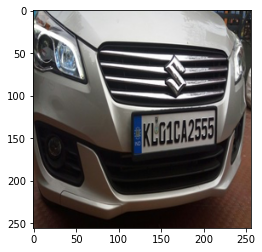

In [6]:
img = plt.imread('./data/processed/Cars0.png')
print(img.shape)
plt.imshow(img)
plt.show()

### Filtrado

Un aspecto importante del trabajo a realizar es detectar los bordes de la imagen, con el fin de poder reconocer los caracteres presentes en las placas patentes. Como primer acercamiento utilizaremos el filtro *FIND_EDGES* del módulo ImageFilter de la librería PIL.

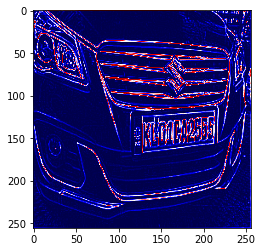

In [7]:
img = Image.open('./data/processed/Cars0.png')
bw = img.convert("L")
edg = bw.filter(ImageFilter.FIND_EDGES)
plt.imshow(edg, cmap='seismic')
plt.show()

Procesaremos todas las imágenes del dataset con este filtro y almacenaremos los resultados en el directorio: *./data/filtered/*

In [8]:
filtered_path = './data/filtered/'
for car_image in sorted(os.listdir(processed_path)):
    img = Image.open(processed_path + car_image)
    bw = img.convert("L")
    edg = bw.filter(ImageFilter.FIND_EDGES)
    edg.save(filtered_path + car_image)
    print(f"Imagen guardada! -> {filtered_path + car_image}")
    print("-" * 50)

Imagen guardada! -> ./data/filtered/Cars0.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars1.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars10.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars100.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars101.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars102.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars103.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars104.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars105.png
--------------------------------------------------
Imagen guardada! -> ./data/filtered/Cars106.png
--------------------------------------------------
Imagen guardada